In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('online_retail.csv')

In [3]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom


In [4]:
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,04-12-2011 13:00,8.25,14546.0,United Kingdom
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,04-12-2011 13:00,4.95,14546.0,United Kingdom
1048572,580502,22469,HEART OF WICKER SMALL,3,04-12-2011 13:15,1.65,16931.0,United Kingdom
1048573,580502,23489,VINTAGE BELLS GARLAND,2,04-12-2011 13:15,2.89,16931.0,United Kingdom
1048574,580502,23046,PAPER LANTERN 9 POINT DELUXE STAR,1,04-12-2011 13:15,6.65,16931.0,United Kingdom


In [5]:
data.shape

(1048575, 8)

In [6]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [7]:
data.duplicated().sum()

34150

In [8]:
data = data.drop_duplicates()

In [9]:
data.shape

(1014425, 8)

In [10]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4265
Quantity            0
InvoiceDate         0
Price               0
Customer ID    228826
Country             0
dtype: int64

In [11]:
data = data.drop('Description', axis = 1)

In [12]:
data.shape

(1014425, 7)

In [13]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014425 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1014425 non-null  object        
 1   StockCode    1014425 non-null  object        
 2   Quantity     1014425 non-null  int64         
 3   InvoiceDate  1014425 non-null  datetime64[ns]
 4   Price        1014425 non-null  float64       
 5   Customer ID  785599 non-null   float64       
 6   Country      1014425 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 61.9+ MB


In [15]:
data.describe()

,Quantity,Price,Customer ID
count,1.014425e+06,1.014425e+06,785599.000000
mean,1.009725e+01,4.590115e+00,15313.078667
std,1.352799e+02,1.215813e+02,1695.992802
min,-7.421500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13963.000000
50%,3.000000e+00,2.100000e+00,15235.000000
75%,1.000000e+01,4.150000e+00,16788.000000
max,7.421500e+04,3.897000e+04,18287.000000


In [16]:
data.nunique()

Invoice        52961
StockCode       5304
Quantity        1048
InvoiceDate    47046
Price           2784
Customer ID     5924
Country           43
dtype: int64

In [17]:
data['Year'] = pd.DatetimeIndex(data['InvoiceDate']).year

In [18]:
data.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,2009


In [19]:
Sales = data.loc[data['Quantity'] > 0 & ~(data['Invoice'].str.contains('C'))]

In [20]:
Sales.shape

(992181, 8)

In [21]:
Sales.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,2009


In [22]:
Sales.sample(10)

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Year
166389,505162,84519B,2,2010-04-20 12:13:00,2.95,14812.0,United Kingdom,2010
470320,533740,21090,1,2010-11-18 14:07:00,1.66,NaN,United Kingdom,2010
407426,528382,85039B,1,2010-10-21 18:01:00,1.66,NaN,United Kingdom,2010
14356,490533,22058,4,2009-06-12 16:07:00,1.49,17610.0,United Kingdom,2009
568408,540026,85066,1,2011-04-01 13:25:00,25.49,NaN,United Kingdom,2011
664132,548203,21669,16,2011-03-29 16:41:00,3.95,NaN,United Kingdom,2011
275534,516165,85232B,2,2010-07-18 12:20:00,4.95,13566.0,United Kingdom,2010
134723,502248,22291,1,2010-03-23 14:06:00,2.98,NaN,United Kingdom,2010
1040299,579750,21498,25,2011-11-30 14:42:00,0.42,13536.0,United Kingdom,2011
136043,502427,21898,2,2010-03-24 12:33:00,2.95,17019.0,United Kingdom,2010


In [23]:
Sales_New = Sales.copy()

In [42]:
Sales_New['Revenue'] = Sales_New['Quantity'] * Sales_New['Price']

In [43]:
Sales_New.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
3,489434,22041,48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,2009,100.8
4,489434,21232,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,2009,30.0


In [44]:
Sales_Mean = Sales_New.groupby('Year').mean()['Revenue']

In [45]:
Sales_Mean.head()

Year
2009    18.856094
2010    20.115675
2011    19.894068
Name: Revenue, dtype: float64

In [46]:
Sales_Mean = Sales_Mean.reset_index()

In [47]:
Sales_Mean.head()

,Year,Revenue
0,2009,18.856094
1,2010,20.115675
2,2011,19.894068


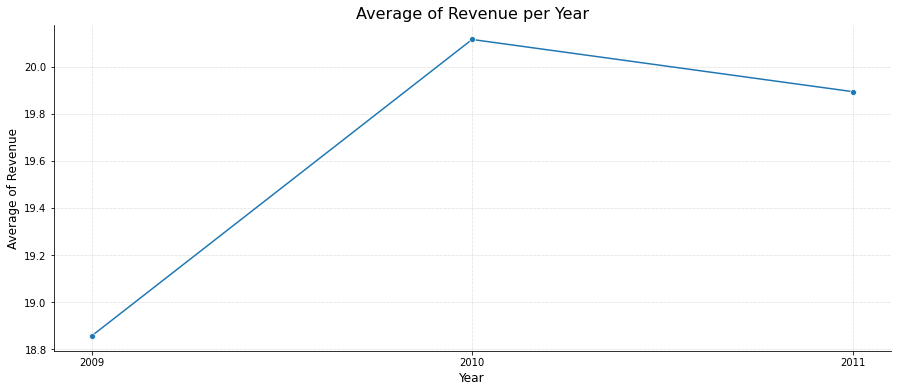

In [48]:
plt.figure(figsize=(15,6))
sns.lineplot(Sales_Mean['Year'], Sales_Mean['Revenue'], marker='o')
plt.title('Average of Revenue per Year', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Average of Revenue', fontsize = 12)
plt.grid(color='darkgrey', linestyle=':', linewidth=0.5)
plt.gca().set_xticks([2009, 2010, 2011])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [49]:
Sales_Finish = Sales_New[Sales_New['Customer ID'].notna()]

In [50]:
Sales_Finish.count()

Invoice        767439
StockCode      767439
Quantity       767439
InvoiceDate    767439
Price          767439
Customer ID    767439
Country        767439
Year           767439
Revenue        767439
dtype: int64

In [51]:
Purchase_Canceled = data[data['Invoice'].str.contains('C')]

In [52]:
Purchase_Canceled.count()

Invoice        18872
StockCode      18872
Quantity       18872
InvoiceDate    18872
Price          18872
Customer ID    18160
Country        18872
Year           18872
dtype: int64

In [53]:
Count_Finished = Sales_Finish.groupby('Year').count()['Invoice'].reset_index()

In [54]:
Count_Finished

,Year,Invoice
0,2009,30279
1,2010,382156
2,2011,355004


In [55]:
Count_Canceled = Purchase_Canceled.groupby('Year').count()['Invoice'].reset_index()

In [56]:
Count_Canceled

,Year,Invoice
0,2009,1013
1,2010,9559
2,2011,8300


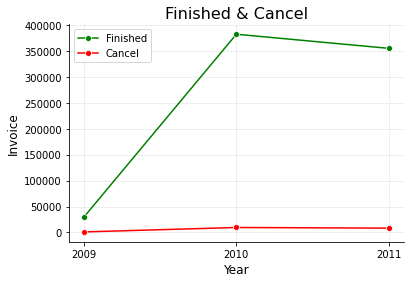

In [57]:
sns.lineplot(Count_Finished['Year'], Count_Finished['Invoice'],
marker = 'o', color = 'green', label = 'Finished')
sns.lineplot(Count_Canceled['Year'], Count_Canceled['Invoice'],
marker = 'o', color = 'red', label = 'Cancel')
plt.title('Finished & Cancel', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Invoice', fontsize = 12)
plt.grid(color='darkgrey', linestyle=':', linewidth=0.5)
plt.legend()
plt.gca().set_xticks([2009, 2010, 2011])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [61]:
Cancellation_Rate = Count_Canceled['Invoice'] / data['Invoice'].count() * 100
Cancellation = Count_Canceled.assign(Cancellation_Rate=Count_Canceled['Invoice'] / data['Invoice'].count() * 100)
Cancellation[['Year', 'Cancellation_Rate']]

,Year,Cancellation_Rate
0,2009,0.099860
1,2010,0.942307
2,2011,0.818198


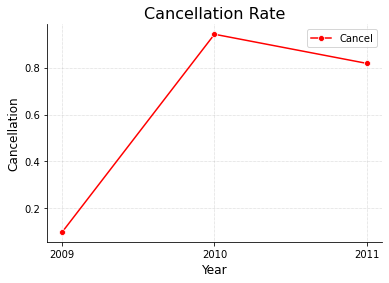

In [62]:
sns.lineplot(Cancellation['Year'], Cancellation['Cancellation_Rate'],
marker = 'o', color = 'red', label = 'Cancel')
plt.title('Cancellation Rate', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Cancellation', fontsize = 12)
plt.grid(color='darkgrey', linestyle=':', linewidth=0.5)
plt.legend()
plt.gca().set_xticks([2009, 2010, 2011])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [63]:
Comparison = Cancellation
Comparison['Total_Finished'] = Count_Finished['Invoice']
Comparison['Total_Canceled'] = Comparison['Invoice']
Comparison[['Year', 'Total_Finished', 'Total_Canceled', 'Cancellation_Rate']]

,Year,Total_Finished,Total_Canceled,Cancellation_Rate
0,2009,30279,1013,0.099860
1,2010,382156,9559,0.942307
2,2011,355004,8300,0.818198
